In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm, sinm, cosm
from scipy.special import erf

In [30]:
#set integration variables
n=1000
delta=0.001

#set system energies and dipoles
Ea=0
Eb=0.5
muab=muba=1.0

#initialize and set external field parameters
F=np.zeros(n, dtype=complex)
w=0.166
Fw=0.02

#initizlize vectors for polarization and population and Hamiltonian and dipole matrices
P=np.zeros(n, dtype=complex)
popa=np.zeros(n, dtype=complex)
popb=np.zeros(n, dtype=complex)
H=np.array([[Ea, 0.0],
         [0.0, Eb]], dtype=complex)

mu=np.array([[0.0, muab],
             [muba, 0.0]], dtype=complex)

#initialize wave function and set initial population on the ground state
psi=np.zeros((n,2), dtype=complex)

In [31]:
#propagate wave function for n cycles with delta as time step
for k in range(1, n):
    F[k]=Fw*np.sin(w*k)*erf(k*0.01)
    psi[k] = np.dot(expm(-1j*(H-mu*F[k-1])*delta), psi[k-1])
    P[k]=np.dot(np.conj(psi[k]), np.dot(mu, psi[k]))

In [32]:
#compute population 
popa=np.conj(psi[:,0])*psi[:,0]
popb=np.conj(psi[:,1])*psi[:,1]
pop_tot=popa+popb

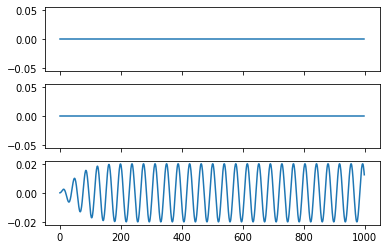

In [33]:
#plot time dependent polarization, population on excited state and the field.
f, (ax1, ax2,ax3)=plt.subplots(3,1,sharex=True)
ax1.plot(P)
ax2.plot(popb)
ax3.plot(F)